In [1]:
# v06 runs may finally have worked for 2D?
#  - fix nans in ET and wave forcing
#  - include structure-related time step flags, as has been done in 3D all along.

# v07,v08 bisect those changes.

# v08 still has the transient at 6/10
# v09 tries a generic structure, still has the transient at 6/10.
# v10 just started. uses a weir, and lots of output around the transient.

In [2]:
from stompy.grid import unstructured_grid, multi_ugrid
import numpy as np
import pandas as pd
import os
import xarray as xr
import stompy.model.delft.dflow_model as dfm
import stompy.model.delft.io as dio
import glob

import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
run_dir='data_2013-2d-slr0ft-v13r' # should be proper 2D

In [4]:
model=dfm.DFlowModel.load(run_dir)

In [5]:
#map_ds=xr.open_dataset(run_dir+'/DFM_OUTPUT_flowfm/flowfm_map.nc')
#g=unstructured_grid.UnstructuredGrid.read_ugrid(map_ds)
map_ds=multi_ugrid.MultiUgrid(run_dir+'/DFM_OUTPUT_flowfm/*_map.nc')
g=map_ds.grid

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)


In [33]:
map_ds.reload()

<IPython.core.display.Javascript object>


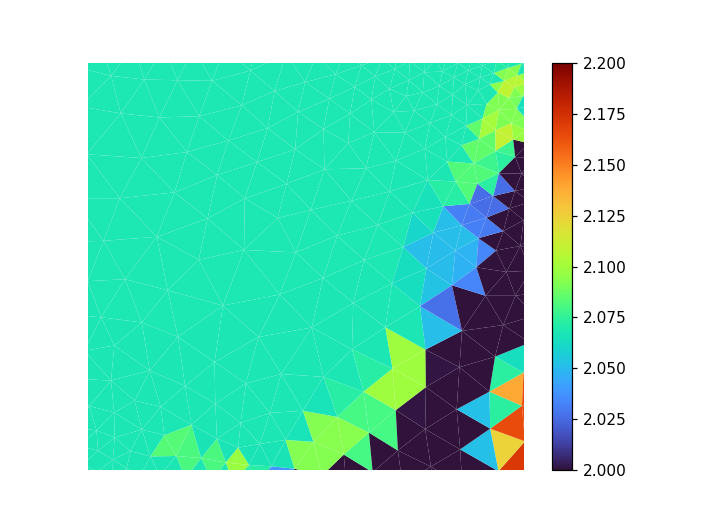

In [36]:
fig,ax=plt.subplots()

ax.set_adjustable('datalim')
ccoll=g.plot_cells(values=map_ds['mesh2d_s1'].isel(time=3),
            cmap='turbo')
plt.colorbar(ccoll)
ax.axis('off')
ccoll.set_clim([2.0,2.2])
#ax.axis((551968.9679951352, 553310.6453882352, 4123859.484601603, 4124997.871990666))

In [40]:
p_ditch=np.r_[553049.5, 4124533.5]
p_inund=np.r_[552953.0, 4124572.8]

cells=[map_ds.grid.select_cells_nearest(p) for p in [p_ditch,p_inund]]

eta=[map_ds['mesh2d_s1'].isel(mesh2d_nFaces=c) for c in cells]

<IPython.core.display.Javascript object>


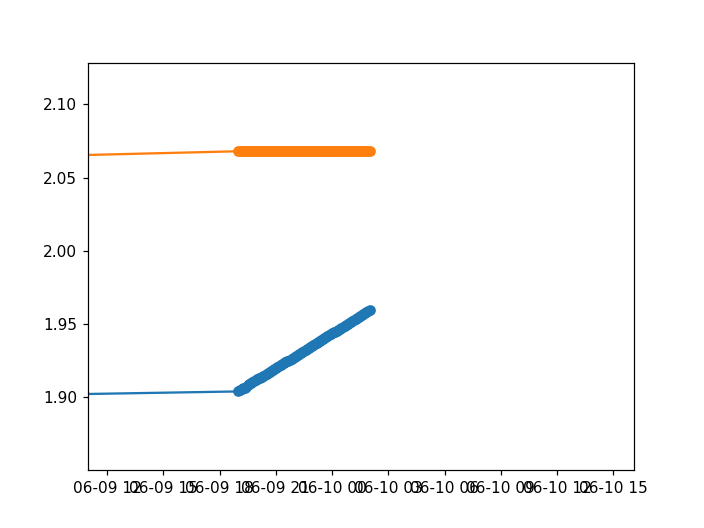

In [42]:
plt.figure()
plt.plot(map_ds.time, eta[0],'-o')
plt.plot(map_ds.time, eta[1],'-o')

In [58]:
ccoll.set_array(map_ds['mesh2d_s1'].isel(time=60).values)
plt.draw()

<IPython.core.display.Javascript object>


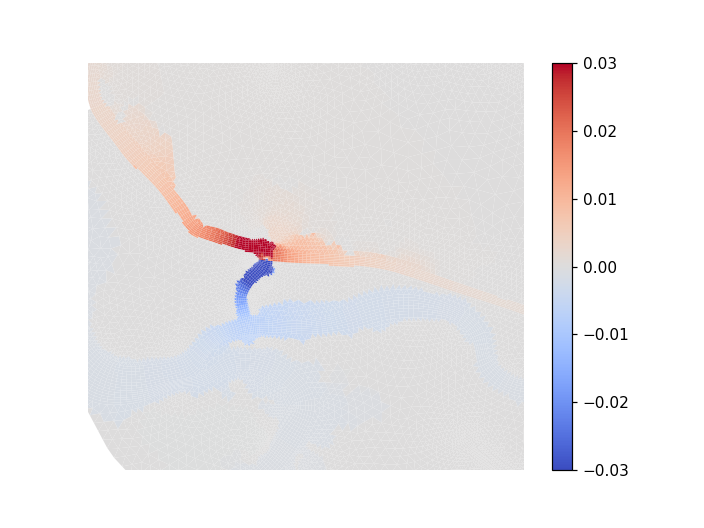

(551968.9679951352, 553310.6453882352, 4123859.484601603, 4124997.871990666)

In [61]:
# weird bump in FS in NM channel at 60
fig,ax=plt.subplots()

ax.set_adjustable('datalim')
delta=map_ds['mesh2d_s1'].isel(time=60).values - map_ds['mesh2d_s1'].isel(time=59).values
ccoll=g.plot_cells(values=delta,cmap='coolwarm')
plt.colorbar(ccoll)
ax.axis('off')
ccoll.set_clim([-0.03,0.03])
ax.axis((551968.9679951352, 553310.6453882352, 4123859.484601603, 4124997.871990666))

<IPython.core.display.Javascript object>


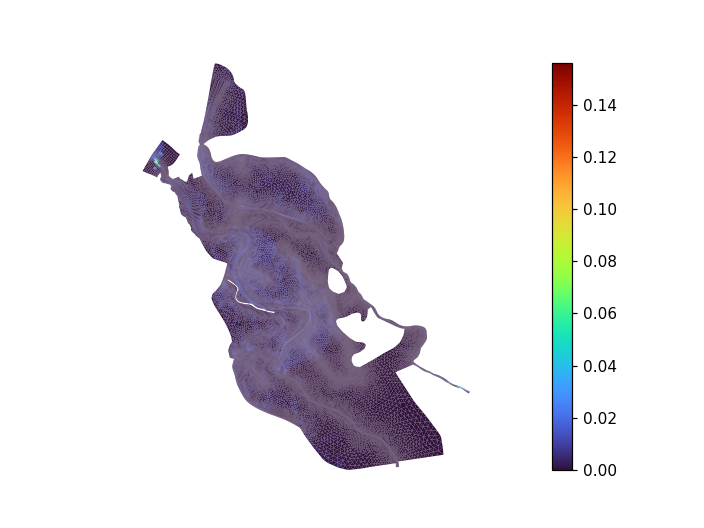

(551962.2152746613, 554066.6495507507, 4122750.3243895927, 4125365.499854582)

In [6]:
fig,ax=plt.subplots()

ax.set_adjustable('datalim')
ccoll=g.plot_cells(values=map_ds['mesh2d_ucmag'].isel(time=77),
            cmap='turbo')
plt.colorbar(ccoll)
ax.axis('off')

In [ ]:
from matplotlib import colors
fig,ax=plt.subplots()

ax.set_adjustable('datalim')
ccoll=g.plot_cells(values=map_ds['mesh2d_Numlimdt'].isel(time=-1).values.clip(1),
                   cmap='turbo',norm=colors.LogNorm(vmin=1))
plt.colorbar(ccoll)
ax.axis('off')

In [10]:
his_ds.close()

In [6]:
his_ds=xr.open_dataset(run_dir+"/DFM_OUTPUT_flowfm/flowfm_0000_his.nc")

In [7]:
qcm_pre2016=pd.read_csv("../../data/ESA_QCM/ESA_draft_PescaderoQCM_output.csv",
                                    skiprows=[0],usecols=range(7),
                                    parse_dates=['Date (PST)'])
qcm=qcm_pre2016
qcm['time']=qcm['Date (PST)'] + np.timedelta64(8,'h') # Shift to UTC.

crest_tim=dio.read_dfm_tim(run_dir+'/mouth_CrestLevel.tim',ref_time=np.datetime64('2013-03-22 00:00'))
crestB_tim=dio.read_dfm_tim(run_dir+'/mouth_B_CrestLevel.tim',ref_time=np.datetime64('2013-03-22 00:00'))

ocean_tim=dio.read_dfm_tim(run_dir+'/ocean_bc_0001.tim',ref_time=np.datetime64('2013-03-22 00:00'))

<IPython.core.display.Javascript object>


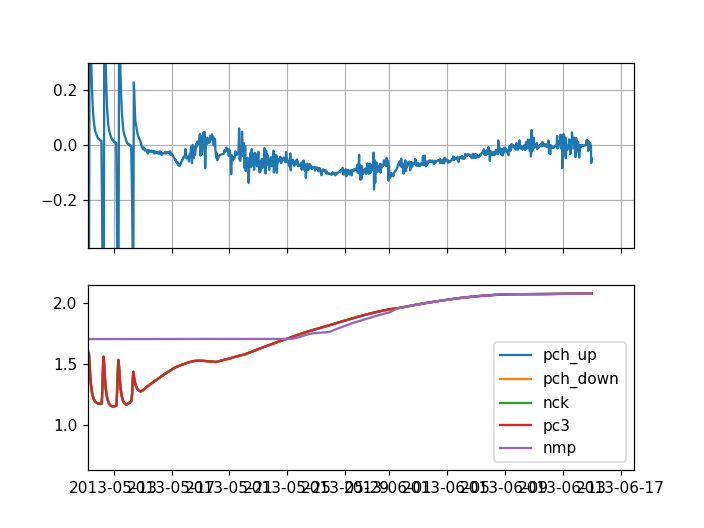

/home/rustyh/miniconda3/envs/general/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [8]:
fig,axs=plt.subplots(2,1,sharex=True)

#axs[0].plot(his_ds.time, his_ds.gategen_discharge.isel(gategens=0),label='pch_gate')
axs[0].plot(his_ds.time, -his_ds.cross_section_discharge.isel(cross_section=3),label='n_complex_xs')

#axs[1].plot(his_ds.time, his_ds.gategen_s1up.isel(gategens=0),label='pch_gate s1up')
#axs[1].plot(his_ds.time, his_ds.gategen_s1dn.isel(gategens=0),label='pch_gate s1dn')

axs[1].plot(his_ds.time, his_ds.waterlevel.isel(stations=0),label='pch_up')
axs[1].plot(his_ds.time, his_ds.waterlevel.isel(stations=1),label='pch_down')
axs[1].plot(his_ds.time, his_ds.waterlevel.isel(stations=7),label='nck')
axs[1].plot(his_ds.time, his_ds.waterlevel.isel(stations=10),label='pc3')
axs[1].plot(his_ds.time, his_ds.waterlevel.isel(stations=11),label='nmp')

#axs[1].plot(his_ds.time, his_ds.waterlevel.isel(stations=16),label='ocean')
#axs[1].plot(crest_tim.time, crest_tim.val1,label='Mouth crest')

#axs[0].plot(map_ds.time, np.zeros(len(map_ds.time)), 'go')

axs[1].legend(loc='lower right')

In [9]:
map_ds.time.values

array(['2013-03-22T12:00:00.000000000'], dtype='datetime64[ns]')

In [26]:
# 2013-06-09 19:00
# 2013-06-10 02:00
(np.datetime64('2013-06-09 19:00') - model.ref_date)/np.timedelta64(1,'s')
(np.datetime64('2013-06-10 02:00') - model.ref_date)/np.timedelta64(1,'s')
#  7 hours. output every 5 minutes? 

6919200.0

In [ ]:
# While tidal, things look fine. But then we get some weird blips say around 6/10. the downstream
# side (s1dn and pch_down) dip. presumably due to partial breach?
# at the same time, pch_up actually jumps up.  Why? 
# I think this is a DFM bug. 
# the run does complete in v06, but this feature is weird.
# The mouth time series, ocean BC time series, water balance time series,
# all show nothing odd at this time.
# The first sign of weirdness is, simultaneously, pch_up rises, pch_gate s1up 
# falls (?), and both of the downstream water levels fall, with the downstream
# side of the gate falling more.
# there is no disturbance at the mouth
# appears that the sign convention for gate discharge is positive downstream
# The discharge time series is sort of twitchy - is that instability, or
# some forcing term like wind?
# Oddly, pch_up jumps up, while gate s1up drops
# What about other nearby stations? They react to this, but no sudden 
# jumps. points to numerical or config issues at the culverts.

In [ ]:
# No strange values in source_sink discharge.
#his_ds['source_sink_prescribed_discharge'].values.max()
his_ds['general_structure_discharge']

<IPython.core.display.Javascript object>


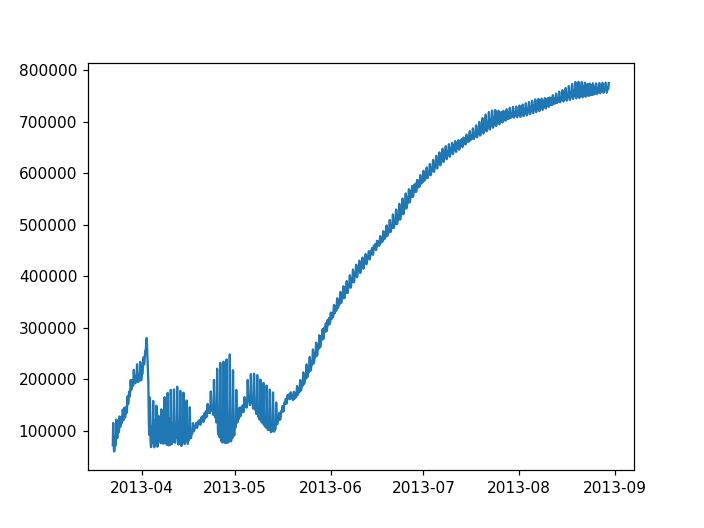

In [9]:
plt.figure()
plt.plot(his_ds.time, his_ds['water_balance_total_volume'])

<IPython.core.display.Javascript object>


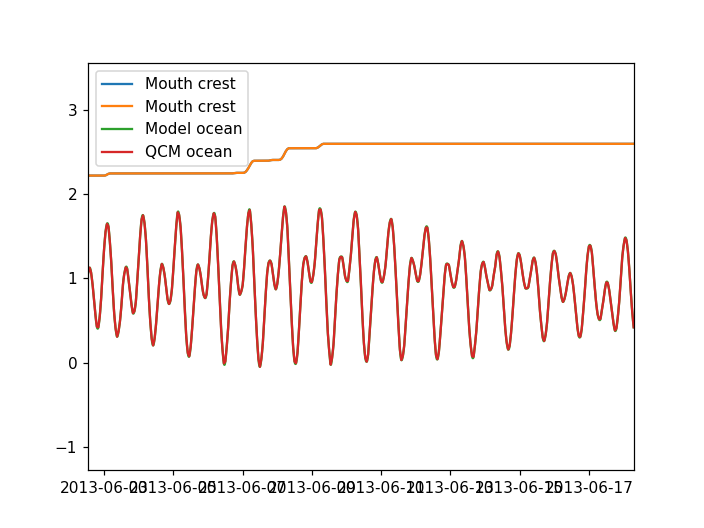

INFO:numexpr.utils:Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [13]:
plt.figure()
plt.plot(crest_tim.time, crest_tim.val1,label='Mouth crest')
plt.plot(crestB_tim.time, crestB_tim.val1,label='Mouth crest')
plt.plot(ocean_tim.time, ocean_tim.val1,label='Model ocean')
plt.plot(qcm.time, qcm['Ocean level (feet NAVD88)']*0.3048,label='QCM ocean')
plt.legend()

<IPython.core.display.Javascript object>


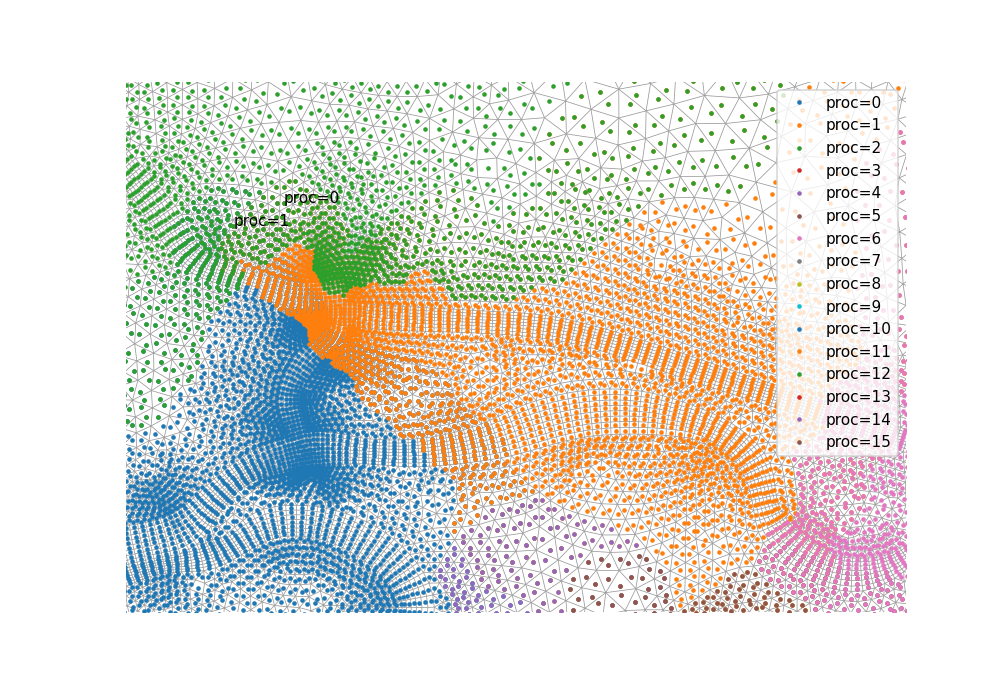

(552482.1200214378, 552642.4166462648, 4124379.3667188897, 4124498.8135586805)

In [25]:
# Are we just unlucky, and the domain boundaries fall right around here?
# Looks okay. one domain is clearly on the upstream and downstream sides.
fig,ax=plt.subplots()
ax.set_adjustable('datalim')
map_ds.grid.plot_edges(color='0.6',lw=0.5)
for i,ds in enumerate(map_ds.dss):
    plt.plot(ds['mesh2d_face_x'],ds['mesh2d_face_y'],'.',ms=4,label=f"proc={i}")
    plt.text(ds['mesh2d_face_x'].values[0],
             ds['mesh2d_face_y'].values[0],
             f"proc={i}")
plt.axis((552482.1200214378, 552642.4166462648, 4124379.3667188897, 4124498.8135586805))
ax.legend()
ax.axis('off')

<IPython.core.display.Javascript object>


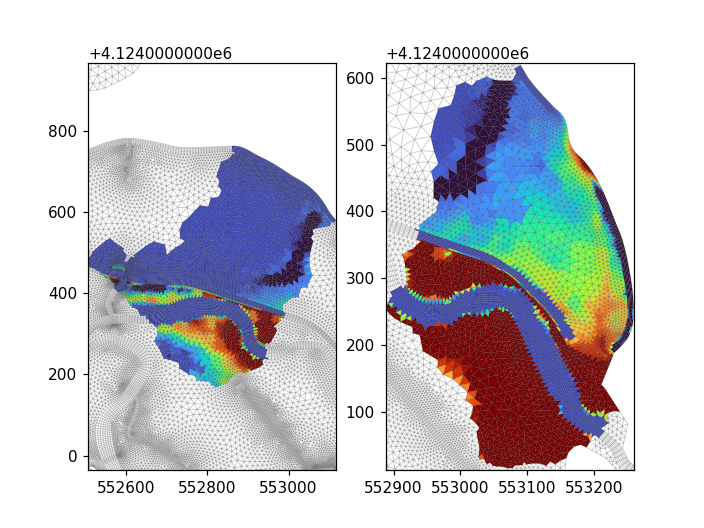

[None, None, None, None]

In [35]:
fig,axs=plt.subplots(1,2)
for ax in axs:
    ax.set_adjustable('datalim')
    
colls=[]
for ax,proc in zip(axs,[1,6]):
    dsp=map_ds.dss[proc]
    gp=unstructured_grid.UnstructuredGrid.read_ugrid(dsp)
    #s0=dsp['mesh2d_s1'].isel(time=0)
    s1=dsp['mesh2d_s1'].isel(time=1)
    #gp.plot_cells(values=s1-s0,ax=axs[0])
    colls.append(gp.plot_cells(values=dsp['mesh2d_s1'].isel(time=-1),ax=ax))
    map_ds.grid.plot_edges(color='k',alpha=0.2,lw=0.6,ax=ax)
    
plt.setp(colls,clim=[2.0,2.8],cmap='turbo')

In [32]:
map_ds.dss[0]

<xarray.Dataset>
Dimensions:                      (Two: 2, mesh2d_nEdges: 9039, mesh2d_nFaces: 5427, mesh2d_nMax_face_nodes: 4, mesh2d_nNodes: 3613, time: 86)
Coordinates:
    mesh2d_node_x                (mesh2d_nNodes) float64 5.526e+05 ... 5.526e+05
    mesh2d_node_y                (mesh2d_nNodes) float64 4.125e+06 ... 4.124e+06
    mesh2d_edge_x                (mesh2d_nEdges) float64 ...
    mesh2d_edge_y                (mesh2d_nEdges) float64 ...
    mesh2d_face_x                (mesh2d_nFaces) float64 5.526e+05 ... 5.526e+05
    mesh2d_face_y                (mesh2d_nFaces) float64 4.125e+06 ... 4.124e+06
  * time                         (time) datetime64[ns] 2013-03-22T12:00:00 ... 2013-06-10T02:00:00
Dimensions without coordinates: Two, mesh2d_nEdges, mesh2d_nFaces, mesh2d_nMax_face_nodes, mesh2d_nNodes
Data variables:
    projected_coordinate_system  int32 ...
    mesh2d                       int32 ...
    mesh2d_node_z                (mesh2d_nNodes) float64 1.985 1.972 ... 0.5

<IPython.core.display.Javascript object>


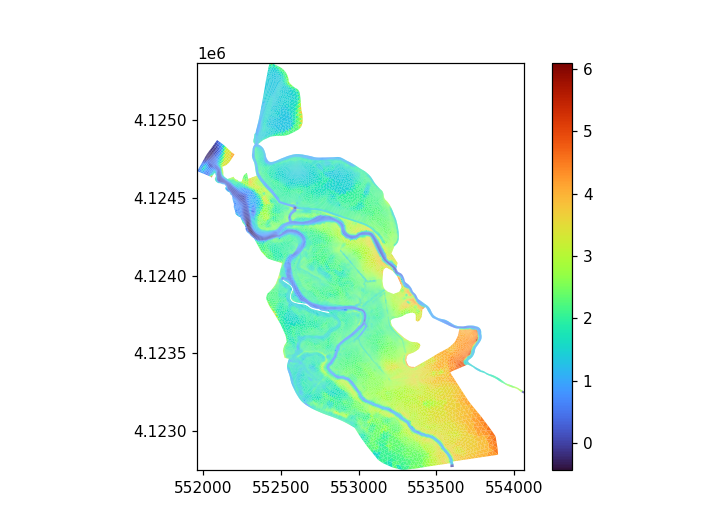

In [34]:
plt.figure()
coll=map_ds.grid.plot_cells(values=map_ds['mesh2d_flowelem_bl'],cmap='turbo')
plt.colorbar(coll)

<IPython.core.display.Javascript object>


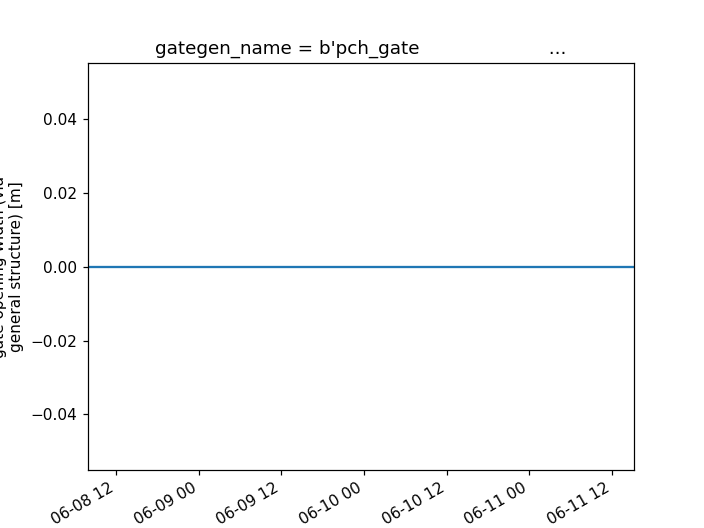

(15864.3305975608, 15867.6304561207, -0.05500000000000001, 0.05500000000000001)

In [34]:
# check the other history output for this gate
plt.figure()
#his_ds.gategen_crest_level.isel(gategens=0).plot() # flat 0.5
#his_ds.gategen_crest_width.isel(gategens=0).plot() # flat 0.99
#his_ds.gategen_gate_lower_edge_level.isel(gategens=0).plot() # flat 1.70
#his_ds.gategen_flow_through_height.isel(gategens=0).plot() # 1.2 with a dip to 1.1
# That is maybe the water surface elevation in the gate?
his_ds.gategen_gate_opening_width.isel(gategens=0).plot() # 0.0

plt.axis(xmin=15864.3305975608,
         xmax=15867.6304561207)

#gategen_gate_lower_edge_level  
#gategen_flow_through_height
#gategen_gate_opening_width

In [14]:
# Visual inspections of all forcing data:
# All look fine.
# The timing of the weirdness coincides with when the mouth level bumps up
# to a higher elevation.
# So there could be some grid weirdness that links some cells that are then
# getting wet with something in NM. maybe?

check_dir="data_2013-2d-slr0ft-v07"
check_his=xr.open_dataset(check_dir+"/DFM_OUTPUT_flowfm/flowfm_0000_his.nc")

In [17]:

# check on grid -- any chance there is some weird stuff?

['data_2013-2d-slr0ft-v07/mouth_B_GateOpeningWidth.tim',
 'data_2013-2d-slr0ft-v07/rainfall.tim',
 'data_2013-2d-slr0ft-v07/pescadero_ck_0001.tim',
 'data_2013-2d-slr0ft-v07/ocean_bc_0001.tim',
 'data_2013-2d-slr0ft-v07/mouth_GateOpeningWidth.tim',
 'data_2013-2d-slr0ft-v07/mouth_B_CrestLevel.tim',
 'data_2013-2d-slr0ft-v07/wind.tim',
 'data_2013-2d-slr0ft-v07/mouth_CrestLevel.tim',
 'data_2013-2d-slr0ft-v07/wave_overtop.tim',
 'data_2013-2d-slr0ft-v07/seepage.tim',
 'data_2013-2d-slr0ft-v07/butano_ck_0001.tim']

<IPython.core.display.Javascript object>


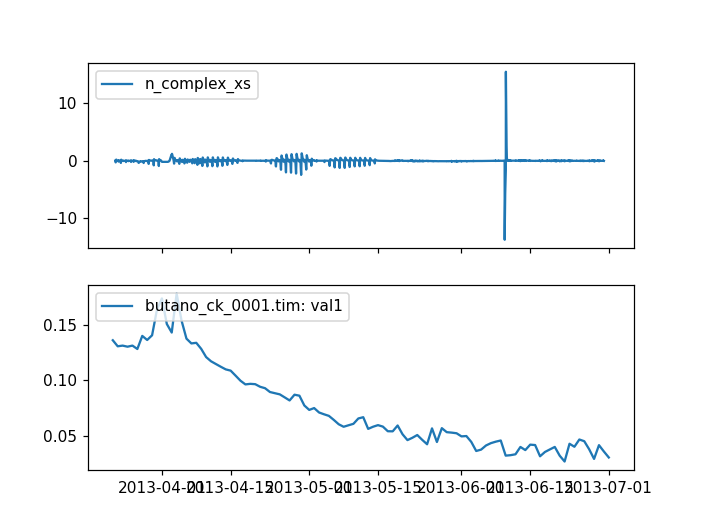

<IPython.core.display.Javascript object>


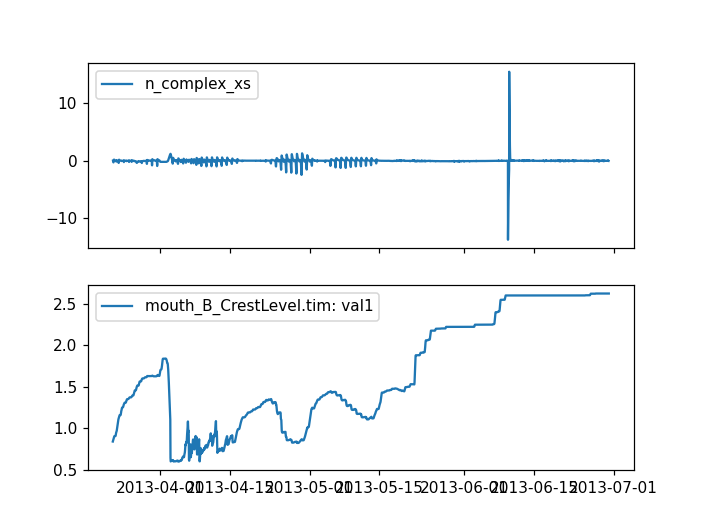

<IPython.core.display.Javascript object>


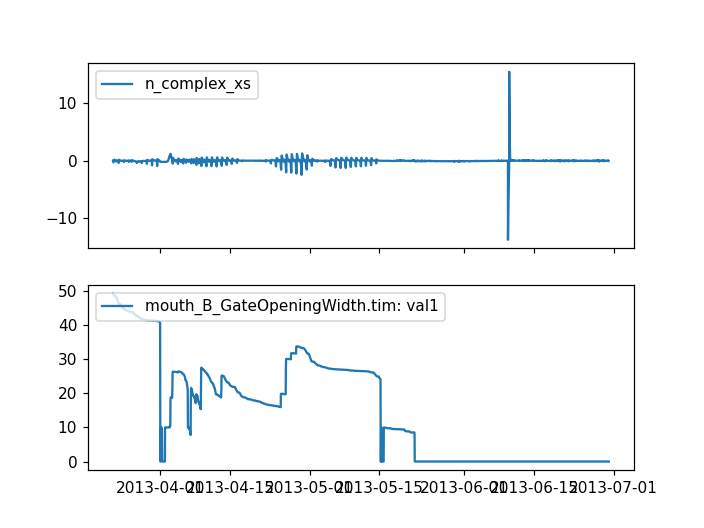

<IPython.core.display.Javascript object>


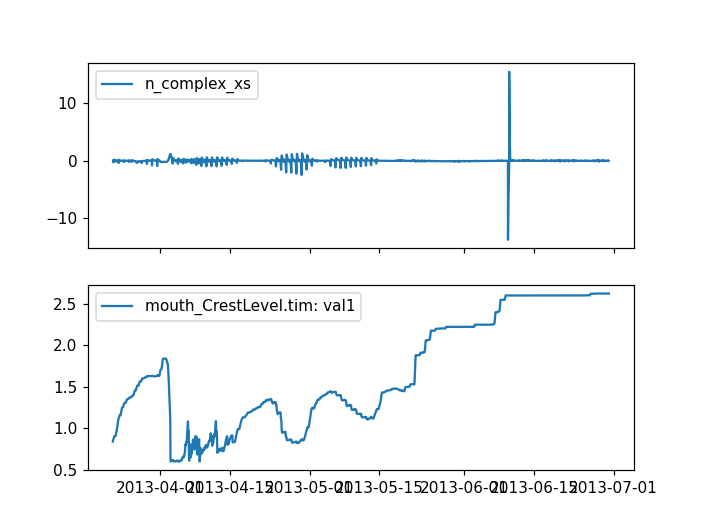

<IPython.core.display.Javascript object>


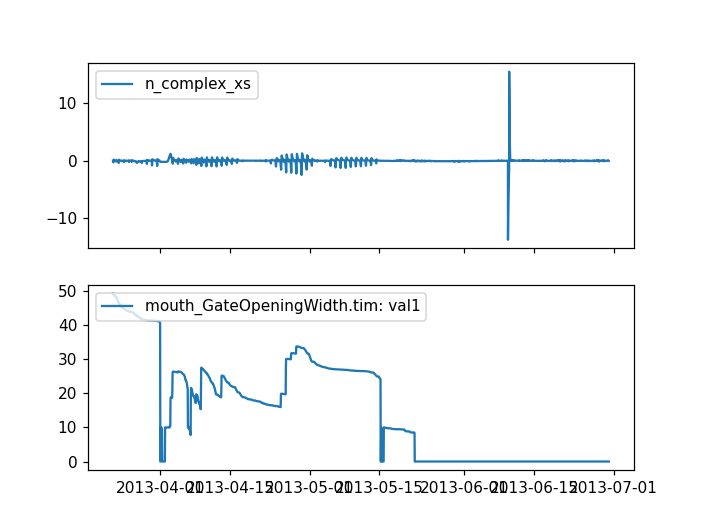

<IPython.core.display.Javascript object>


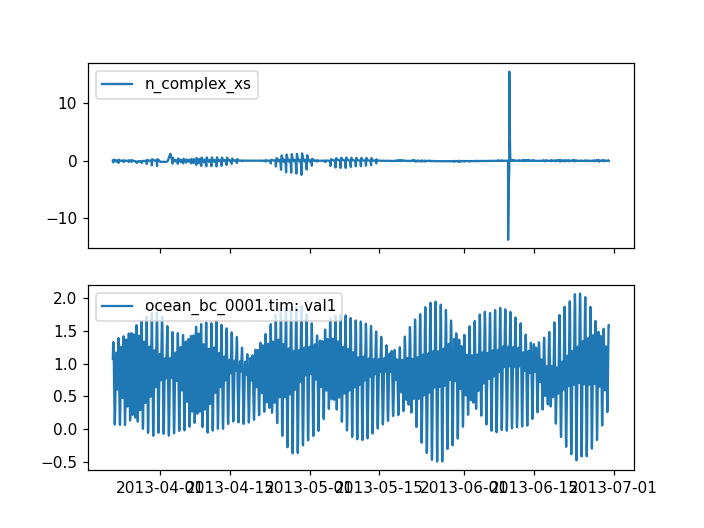

<IPython.core.display.Javascript object>


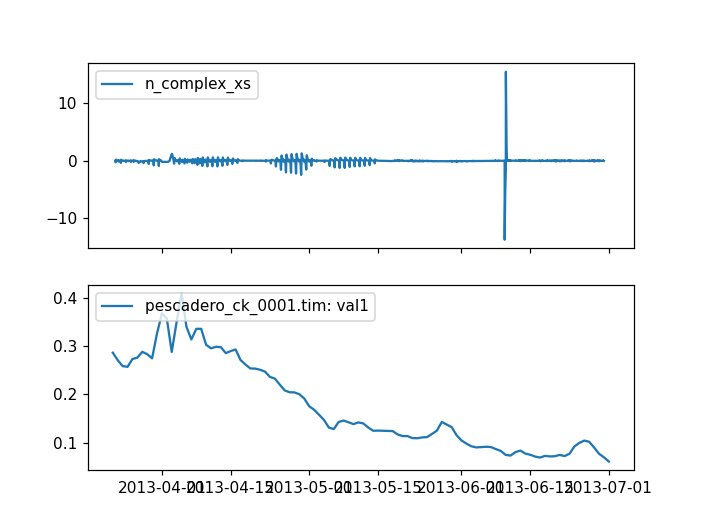

<IPython.core.display.Javascript object>


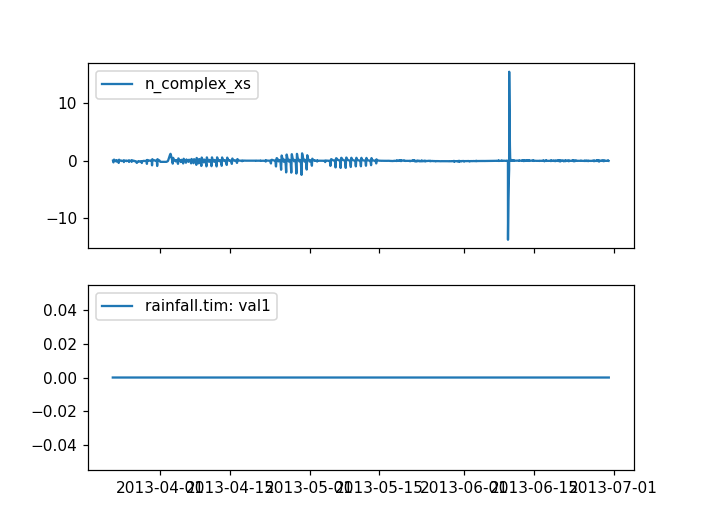

<IPython.core.display.Javascript object>


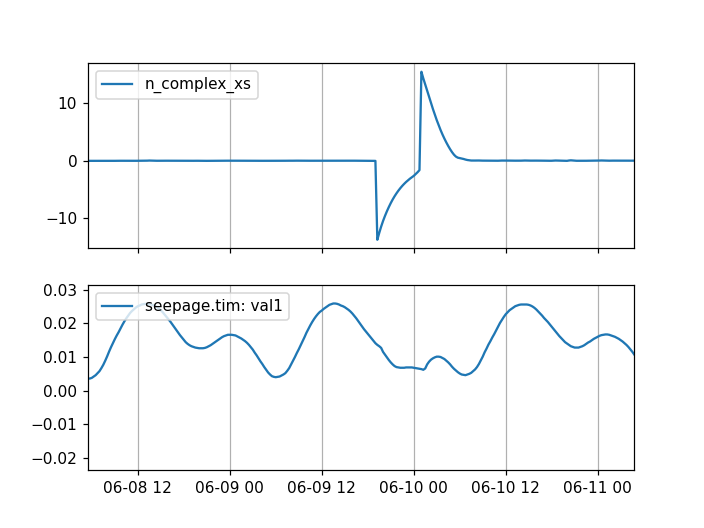

<IPython.core.display.Javascript object>


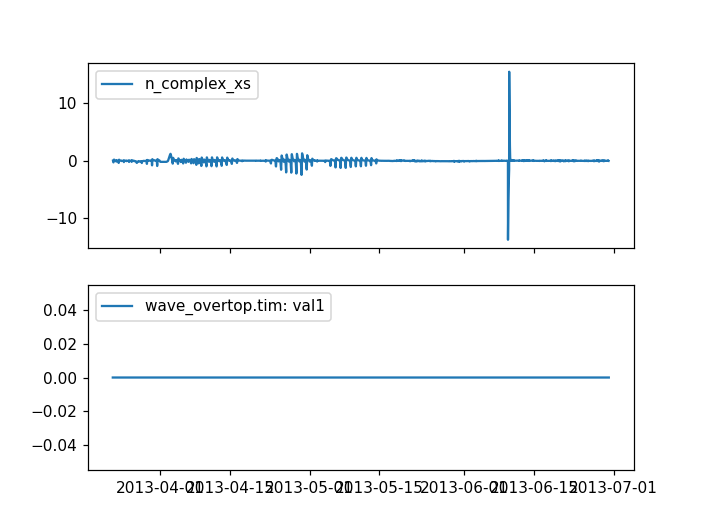

<IPython.core.display.Javascript object>


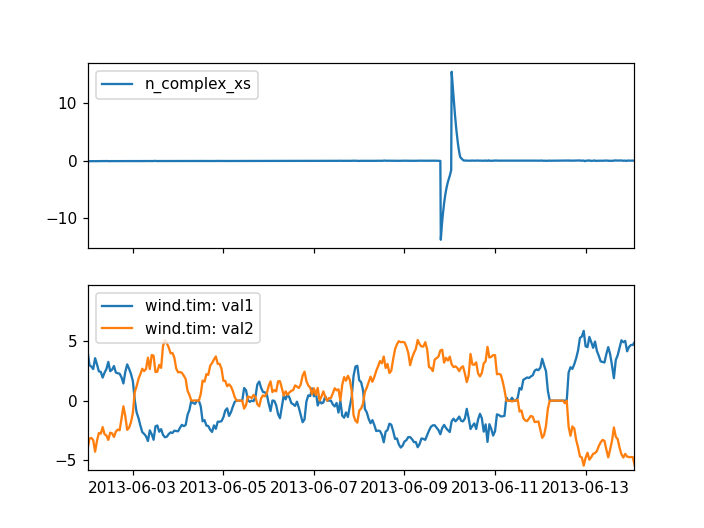

In [28]:
fns=glob.glob(check_dir+"/*.tim")
fns.sort()

for fn in fns:
    fig,axs=plt.subplots(2,1,sharex=True)

    axs[0].plot(check_his.time, -check_his.cross_section_discharge.isel(cross_section=3),
                label='n_complex_xs')

    tim=dio.read_dfm_tim(fn,ref_time=np.datetime64('2013-03-22 00:00'))
    for val in ['val1','val2','val3','val4']:
        if val in tim:
            axs[1].plot(tim.time,tim[val],label=f"{os.path.basename(fn)}: {val}")
            values=tim[val].values
            if np.any(~np.isfinite(values)):
                print(f"{val} has some non-finite data")
        else:
            break
    axs[0].legend(loc='upper left')
    axs[1].legend(loc='upper left')
    

In [20]:
tim

<xarray.Dataset>
Dimensions:  (time: 102)
Coordinates:
  * time     (time) datetime64[ns] 2013-03-22 2013-03-23 ... 2013-07-01
Data variables:
    val1     (time) float64 0.1359 0.1305 0.1311 ... 0.04171 0.03601 0.03064
Attributes:
    source:   data_2013-2d-slr0ft-v07/butano_ck_0001.tim